# Digikala product forecast
In this kernel we will read the dataset of Digikala which have information about sell history of products. Digikala want to suggest products to sellers to make available.

### dataset contain:
id
date : information saved in this date
seller : seller id
item : product id
sales : number of sales of the product

## problem :
#### make predict of product based on sales history of products


#### Necessary library

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#### SMAPE function to measure our output

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#### Read files

In [ ]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')


In [ ]:
train.head()

,id,date,seller,item,sales
0,0,2015-05-01,1,1,21
1,1,2015-05-01,2,1,45
2,2,2015-05-01,3,1,28
3,3,2015-05-01,4,1,34
4,4,2015-05-01,5,1,21


In [ ]:
test.head()

,id,date,seller,item
0,0,2020-04-04,1,1
1,1,2020-04-04,2,1
2,2,2020-04-04,3,1
3,3,2020-04-04,4,1
4,4,2020-04-04,5,1


In [ ]:
# set index column as index in train file and test file
train.set_index('id', inplace=True)
test.set_index('id', inplace=True)

#### Review our data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 899999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    900000 non-null  object
 1   seller  900000 non-null  int64 
 2   item    900000 non-null  int64 
 3   sales   900000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 34.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13000 entries, 0 to 12999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    13000 non-null  object
 1   seller  13000 non-null  int64 
 2   item    13000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 406.2+ KB


## looking for null, Nan or non relative input in rows

In [ ]:
train.isnull().sum()

date      0
seller    0
item      0
sales     0
dtype: int64

In [ ]:
test.isnull().sum()

date      0
seller    0
item      0
dtype: int64

In [ ]:
train.seller.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [ ]:
test.seller.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [ ]:
train.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [ ]:
test.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [ ]:
train.sales.unique()

array([ 21,  45,  28,  34,  27,  25,  26,  37,  32,  22,  20,  35,  38,
        24,  40,  33,  11,  29,  39,  17,  30,  53,  47,  41,  46,  16,
        14,  43,  19,  44,  23,  18,  42,  15,  31,  36,  48,   8,  13,
         9,  49,  12,  51,  55,  52,  57,  56,  62,  59,  54,  61,  58,
        60,  50,  64,  63,  75,  66,  82,  72,  70,  76,  67,  78,  68,
        77,  65,  74,  73,  84,  71,  69,  81,  80,  91,  79,  93,  83,
        87,  98,  85, 100,  90,  94,  86,  88,  89,  95,  92, 105,  97,
       102,  96, 103, 113, 106,  99, 109, 107, 104, 108, 110, 101, 120,
       117, 116, 114, 115, 126, 118, 112, 119, 111, 123, 130, 128, 124,
        10,   7,   3,   5,   6,   4, 121, 122, 127, 132, 125, 129, 143,
       131, 133, 134, 138, 153, 150, 148, 141, 140, 152, 135, 139, 136,
       137, 144, 149, 142, 157, 164, 161, 147, 154, 145,   2,   1,   0,
       169, 156, 159, 155, 163, 165, 146, 160, 158, 151, 162, 171, 168,
       177, 167, 166, 175, 176, 181, 174, 170, 178, 172, 173, 18

## Preparing Data

In [ ]:
# change date columns to date type
train.date = pd.to_datetime(train['date'])
test.date = pd.to_datetime(test['date'])

In [ ]:
# add day and month columns in train data
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month


train = train.drop('date', axis=1)

# add day and month columns in test data
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month


test = test.drop('date', axis=1)

In [ ]:
train.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [ ]:
test.day.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [ ]:
train.month.unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [ ]:
test.month.unique()

array([4], dtype=int64)

In [ ]:
train.head()

,seller,item,sales,day,month
id,,,,,
0,1,1,21,1,5
1,2,1,45,1,5
2,3,1,28,1,5
3,4,1,34,1,5
4,5,1,21,1,5


In [ ]:
item_sales = train.groupby('item').sales.mean()
item_sales.sort_values(ascending=False)

item
18    88.212778
31    88.072111
16    84.481500
21    84.450667
28    80.849833
48    80.754333
41    80.677222
25    80.667778
39    77.181722
11    77.104778
13    73.378056
14    69.779167
15    69.778389
32    69.754667
36    69.711944
27    66.177833
3     66.029333
38    65.938167
17    58.799944
34    58.760444
49    58.750944
5     58.685722
10    58.648278
9     58.622778
12    51.498722
1     51.451722
46    51.393444
29    47.744889
23    47.610833
35    44.073556
42    43.975278
22    40.442444
33    40.425556
24    40.403556
45    36.769889
6     36.709167
20    33.065222
47    29.459722
2     29.403556
26    29.355611
40    29.315556
43    29.310389
37    25.787222
19    25.718722
30    22.097222
7     22.059722
44    22.052500
50    22.047500
4     22.028278
8     18.388667
Name: sales, dtype: float64

In [ ]:
month_sales = train.groupby('month').sales.mean()
month_sales.sort_values(ascending=False)

month
11    66.280067
10    63.656619
9     59.344947
12    58.700839
8     55.539458
1     54.842039
3     54.148529
2     51.272155
7     47.982516
6     39.932080
4     38.214878
5     35.634671
Name: sales, dtype: float64

In [ ]:
corr_matrix = train.corr()
corr_matrix['sales'].sort_values(ascending=False)

sales     1.000000
month     0.170869
day       0.003272
seller   -0.008123
item     -0.031485
Name: sales, dtype: float64

In [ ]:
day_sales = train.groupby('day').sales.mean()
day_sales.sort_values(ascending=False)

day
29    53.035286
4     52.853525
18    52.807864
11    52.794542
25    52.780746
13    52.660610
6     52.591661
20    52.582542
27    52.551322
30    52.483556
28    52.417492
26    52.357220
16    52.335458
24    52.326881
17    52.318644
19    52.308068
10    52.293593
12    52.290881
31    52.283486
23    52.273797
9     52.206814
5     52.206780
8     52.104305
1     52.097133
15    52.059864
22    52.054983
14    52.053051
3     52.038900
21    51.997797
7     51.992678
2     51.944100
Name: sales, dtype: float64

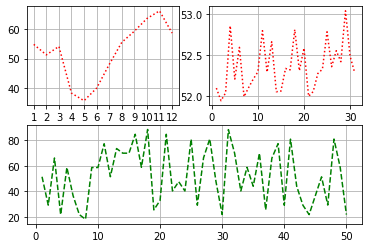

In [ ]:
plt.subplot(212)
plt.plot(item_sales,'g--')
plt.grid(True)
plt.subplot(221)
plt.plot(month_sales,'r:')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(True)
plt.subplot(222)
plt.plot(day_sales,'r:')
plt.grid(True)
plt.show()

## Create Test set

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in split.split(train, train['month']):
    strat_trian_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

In [ ]:
X = strat_trian_set.drop('sales', axis=1)
y = strat_trian_set.sales.copy()

In [ ]:
y

id
895552     33
777221     22
507985     17
77981      99
83062      49
         ... 
93722      22
794303     31
196181    126
560204     55
379584     36
Name: sales, Length: 720000, dtype: int64

In [ ]:
some_data = X.iloc[:5]
some_labels = y.iloc[:5]

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

KeyboardInterrupt: 

In [ ]:
log_pred = log_reg.predictt

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

lin_pred = lin_reg.predict(some_data)
print("prediction:", lin_pred)

prediction: [43.17176752 46.45652738 51.28088856 61.60767197 51.61729511]


In [ ]:
print("Labels: ", list(some_labels))

Labels:  [33, 22, 17, 99, 49]


In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(some_labels,lin_pred)))

25.619532922047032


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

28.319080511268304


In [ ]:
# last error = 28.319

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=25,min_samples_leaf=7,random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
tree_pred = tree_reg.predict(some_data)
print("prediction Decision Tree:", tree_pred)

prediction Decision Tree: [26.77777778 29.21428571 23.125      99.28571429 46.5       ]


In [ ]:
print("Labels: ", list(some_labels))

Labels:  [33, 22, 17, 99, 49]


In [ ]:
print(np.sqrt(mean_squared_error(some_labels, tree_pred)))

5.188626511961026


In [ ]:
# last error = 15.728 , 6.36, 5.957, 5.188

In [ ]:
smape(some_labels,tree_pred)

17.00883364626456

In [ ]:
# last error = 17.008

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# export_graphviz(tree_reg, out_file='DK-sale.dot', feature_names=X.columns, class_names=train['sales'], rounded=True, filled=True )

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

def display_score(scores):
    print("Scores :", scores)
    print("Mean :", scores.mean())
    print("Std :", scores.std())

display_score(tree_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)

In [ ]:
forest_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
forest_pred = forest_reg.predict(some_data)

In [ ]:
print("prediction Decision Tree:", forest_pred)

prediction Decision Tree: [26.1364798  30.56190043 24.09986508 94.49142532 47.03986508]


In [ ]:
print("Labels: ", list(some_labels))

Labels:  [33, 22, 17, 99, 49]


In [ ]:
print(np.sqrt(mean_squared_error(some_labels,forest_pred)))

6.244862003946916


In [ ]:
# last error = 14.5823, 6.35, 6.40, 6.244 

In [ ]:
smape(some_labels,forest_pred)

19.816462625808143

In [ ]:
# last error = 22.1139, 19.816

scores = cross_val_score(forest_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_score(tree_rmse_scores)

In [ ]:
# Feature Importance
for name, score in zip(X.columns, forest_reg.feature_importances_):
    print(name, score)

seller 0.17400964032490265
item 0.6349648433892411
day 0.062138503649429924
month 0.12888701263642632


from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 5, 10], 'max_features' : [2, 4, 8]},
    {'bootstrap' : [False], 'n_estimators' : [5, 10], 'max_features' : [3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X, y)

grid_search.best_param_

gird_search.best_estimator_

In [ ]:
from sklearn.svm import LinearSVR
svr_reg = LinearSVR()

In [ ]:
svr_reg.fit(X, y)

C:\Users\Aref\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
svr_pred = svr_reg.predict(some_data)

In [ ]:
print(np.sqrt(mean_squared_error(some_labels, svr_pred)))

23.825870074845525


In [ ]:
# last error: 23.825

In [ ]:
smape(some_labels, svr_pred)

42.418198959821886